## Flight Price Prediction

In [1]:
from IPython.display import Image
Image(url= "https://thepinthemapproject.com/wp-content/uploads/2015/05/5427238807_7c9d34686d_z.jpg")

## Introduction

#### Anyone who has booked a flight ticket knows how unexpectedly the prices vary. Airlines use using sophisticated quasi-academic tactics which they call "revenue management" or "yield management". The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -

#### 1)Time of purchase patterns (making sure last-minute purchases are expensive)
#### 2)Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

#### According to Google Trends, the search term - "Cheap Air Tickets" is most searched in India. Moreover, as the middle-class of India is exposed to air travel, consumers hunting for cheap prices increases.

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#n for models
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


#### Importing all the necessaries libraries which will help me for model prediction.

#### Loading excel data

#### Now I am going to upload or read the files/data-sets using pandas. For this we used read_excel.

In [94]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Loading the the first 5 rows of Flight Price Prediction dataset.

In [95]:
df.shape

(10683, 11)

#### There are altogether 10683 rows and 11 columns in Flight Price Prediction dataset.

In [96]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### In Flight Price Prediction dataset columns are both continous and categorical in nature.
#### All the columns count are equal that 10683 so there is no 'NAN' missing values in dataset.
#### There are 1 integer type columns are 10 object type columns in dataset.

In [97]:
df.drop_duplicates(inplace = True)

In [98]:
df.shape

(10463, 11)

#### There is duplicates value in dataset which is removed. Now i have 10463 rows and 11 columns in this dataset.

In [99]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

#### Almost all the columns are categorical in nature only Route,Dep_Time,Arrival_Time,Duration and Price are continous in nature.

## EDA - Exploratory Data Analysis

### Date_of_Journey

#### I can see that Date_of_Journey is a object data type, Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.

#### For this we require pandas to_datetime to convert object data type to datetime dtype.

#### .dt.day method will extract only day of that date

#### .dt.month method will extract only month of that date

#### Since Date_of_Journey is divided into Journey_day and Journey_month so dropping the Date_of_Journey columns as it is of no use.

In [100]:
# I have converted Date_of_Journey column into integers
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

# Since i have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

### Departure time 

#### I can see that Dep_Time is a object data type, Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.
#### For this we require pandas to_datetime to convert object data type to datetime dtype.
#### .dt.hour method will extract only hour of the time.
#### .dt.minute method will extract only minute of the time
#### Since Dep_Time is divided into Dep_hour and Dep_min so dropping the Dep_Time columns as it is of no use.

In [101]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

### Arrival_Time

#### I can see that Arrival_Time is a object data type, Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.
#### For this we require pandas to_datetime to convert object data type to datetime dtype.
#### .dt.hour method will extract only hour of the time.
#### .dt.minute method will extract only minute of the time
#### Since Arrival_Time is divided into Arrival_hour and Arrival_min so dropping the Arrival_Time columns as it is of no use.

In [102]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

## Duration

#### I can see that Duration is a object data type, Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.
#### I am Assigning and converting Duration column into list.
#### Since Duration is divided into Duration_hours and Duration_mins so dropping the Duration columns as it is of no use.

In [103]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [104]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

# dropping duration columns
df.drop(["Duration"], axis = 1, inplace = True)

In [105]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


#### After dividing few columns from the dataset now i can 15 columns out of which 6 columns is still in string data type.

## Handling Categorical Data

#### Airline

In [106]:
df["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

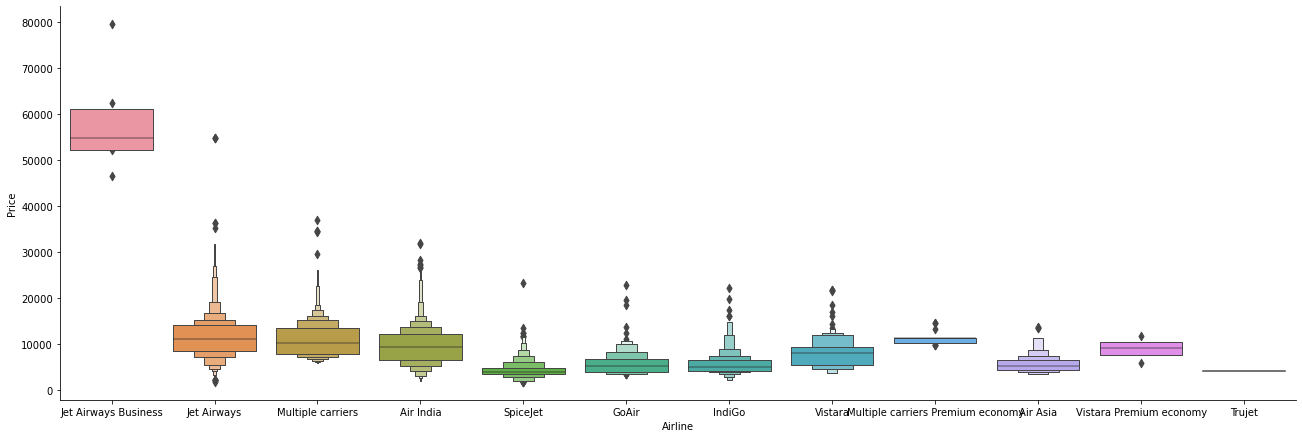

In [108]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

#### From graph we can see that Jet Airways Business have the highest Price.

#### Source

In [109]:
df["Source"].value_counts()

Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

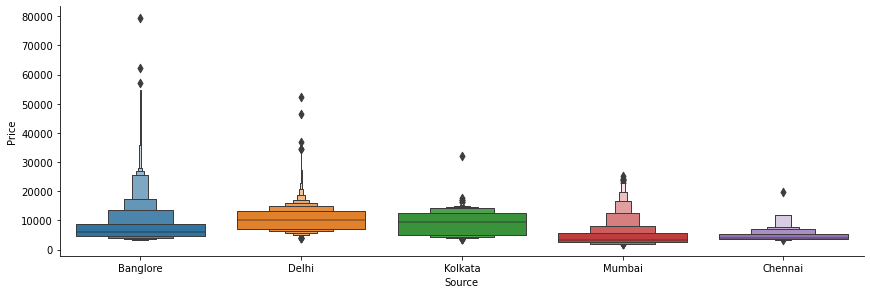

In [110]:
# Source vs Price
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

#### From graph we can see that Banglore have the highest ticket Price.

#### Destination

In [22]:
df["Destination"].value_counts()

Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

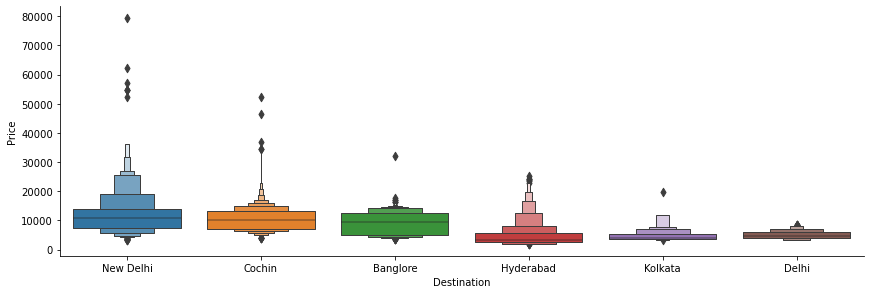

In [23]:
# Destination vs Price
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

#### From graph we can see that New Delhi have the highest ticket Price.

In [24]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

#### Additional_Info contains almost 80% no_info
#### Route and Total_Stops are related to each other
#### So dropping the Route, Additional_Info column from the dataset.

#### Total_Stops

In [25]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

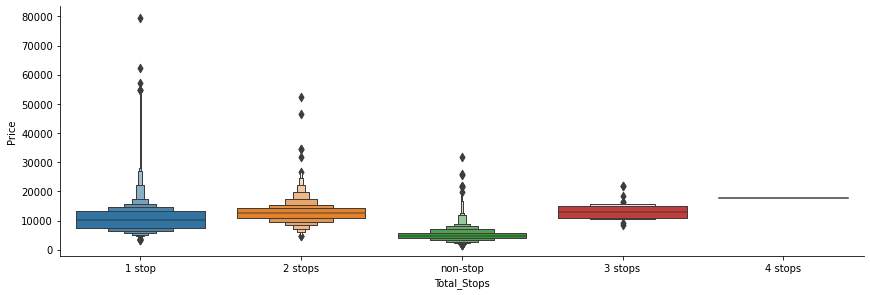

In [26]:
# Total_Stops vs Price
sns.catplot(y = "Price", x = "Total_Stops", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

#### From graph we can see that all the stops have almost same ticket price.

In [27]:
df.shape

(10463, 13)

#### There are 10463 rows and 13 columns in dataset.

In [28]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


#### Ther are 4 columns such as Airline,Source,Destination and Total_Stops are in string. 
#### So I will be using label encoder to convert those columns into integers.

## Label Encoder

In [29]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df.replace({"Cochin": 0, "Banglore": 1, "Delhi": 2, "New Delhi": 3, "Hyderabad": 4,"Kolkata":5}, inplace = True)
df.replace({"Delhi": 0, "Kolkata": 1, "Banglore": 2, "Mumbai": 3, "Chennai": 4}, inplace = True)
df.replace({"Jet Airways": 0, "IndiGo": 1, "Air India": 2, "Multiple carriers": 3, "SpiceJet": 4,"Vistara":5,"Air Asia":6,"GoAir":7,"Multiple carriers Premium economy":8,"Jet Airways Business":9,"Vistara Premium economy":10,"Trujet":11}, inplace = True)

In [30]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,1,1,3,0.0,3897,24,3,22,20,1,10,2,50
1,2,5,1,2.0,7662,1,5,5,50,13,15,7,25
2,0,2,0,2.0,13882,9,6,9,25,4,25,19,0
3,1,5,1,1.0,6218,12,5,18,5,23,30,5,25
4,1,1,3,1.0,13302,1,3,16,50,21,35,4,45


#### After applying Lable Encoder now i can see that all the columns in the dataset is in integers time.

## Filling the missing values

In [31]:
# filling the missing values of continious columns
df['Total_Stops'].fillna(df['Total_Stops'].mean(),inplace=True)

In [32]:
df.describe()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.00000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000
mean,1.733920,2.751219,1.225748,0.802332,9026.642454,13.462487,4.70152,12.478161,24.406958,13.387269,24.719966,10.027430,28.211316
std,1.851111,1.522012,1.420243,0.660577,4624.653227,8.467403,1.16375,5.727055,18.815897,6.855353,16.569658,8.378582,16.878771
min,0.000000,1.000000,0.000000,0.000000,1759.000000,1.000000,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,5224.000000,6.000000,3.00000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,2.000000,1.000000,1.000000,8266.000000,12.000000,5.00000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,3.000000,5.000000,2.000000,1.000000,12343.500000,21.000000,6.00000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,11.000000,5.000000,5.000000,4.000000,79512.000000,27.000000,6.00000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


#### There is a missing value in Total_Stops columns so replaced it with mean.
#### Now I can see that total number of counts in each columns is same.
#### There is difference between mean and 50% that need to be taken care.
#### There are zero value in min rows that need to be taken care.

## Distribution Plot

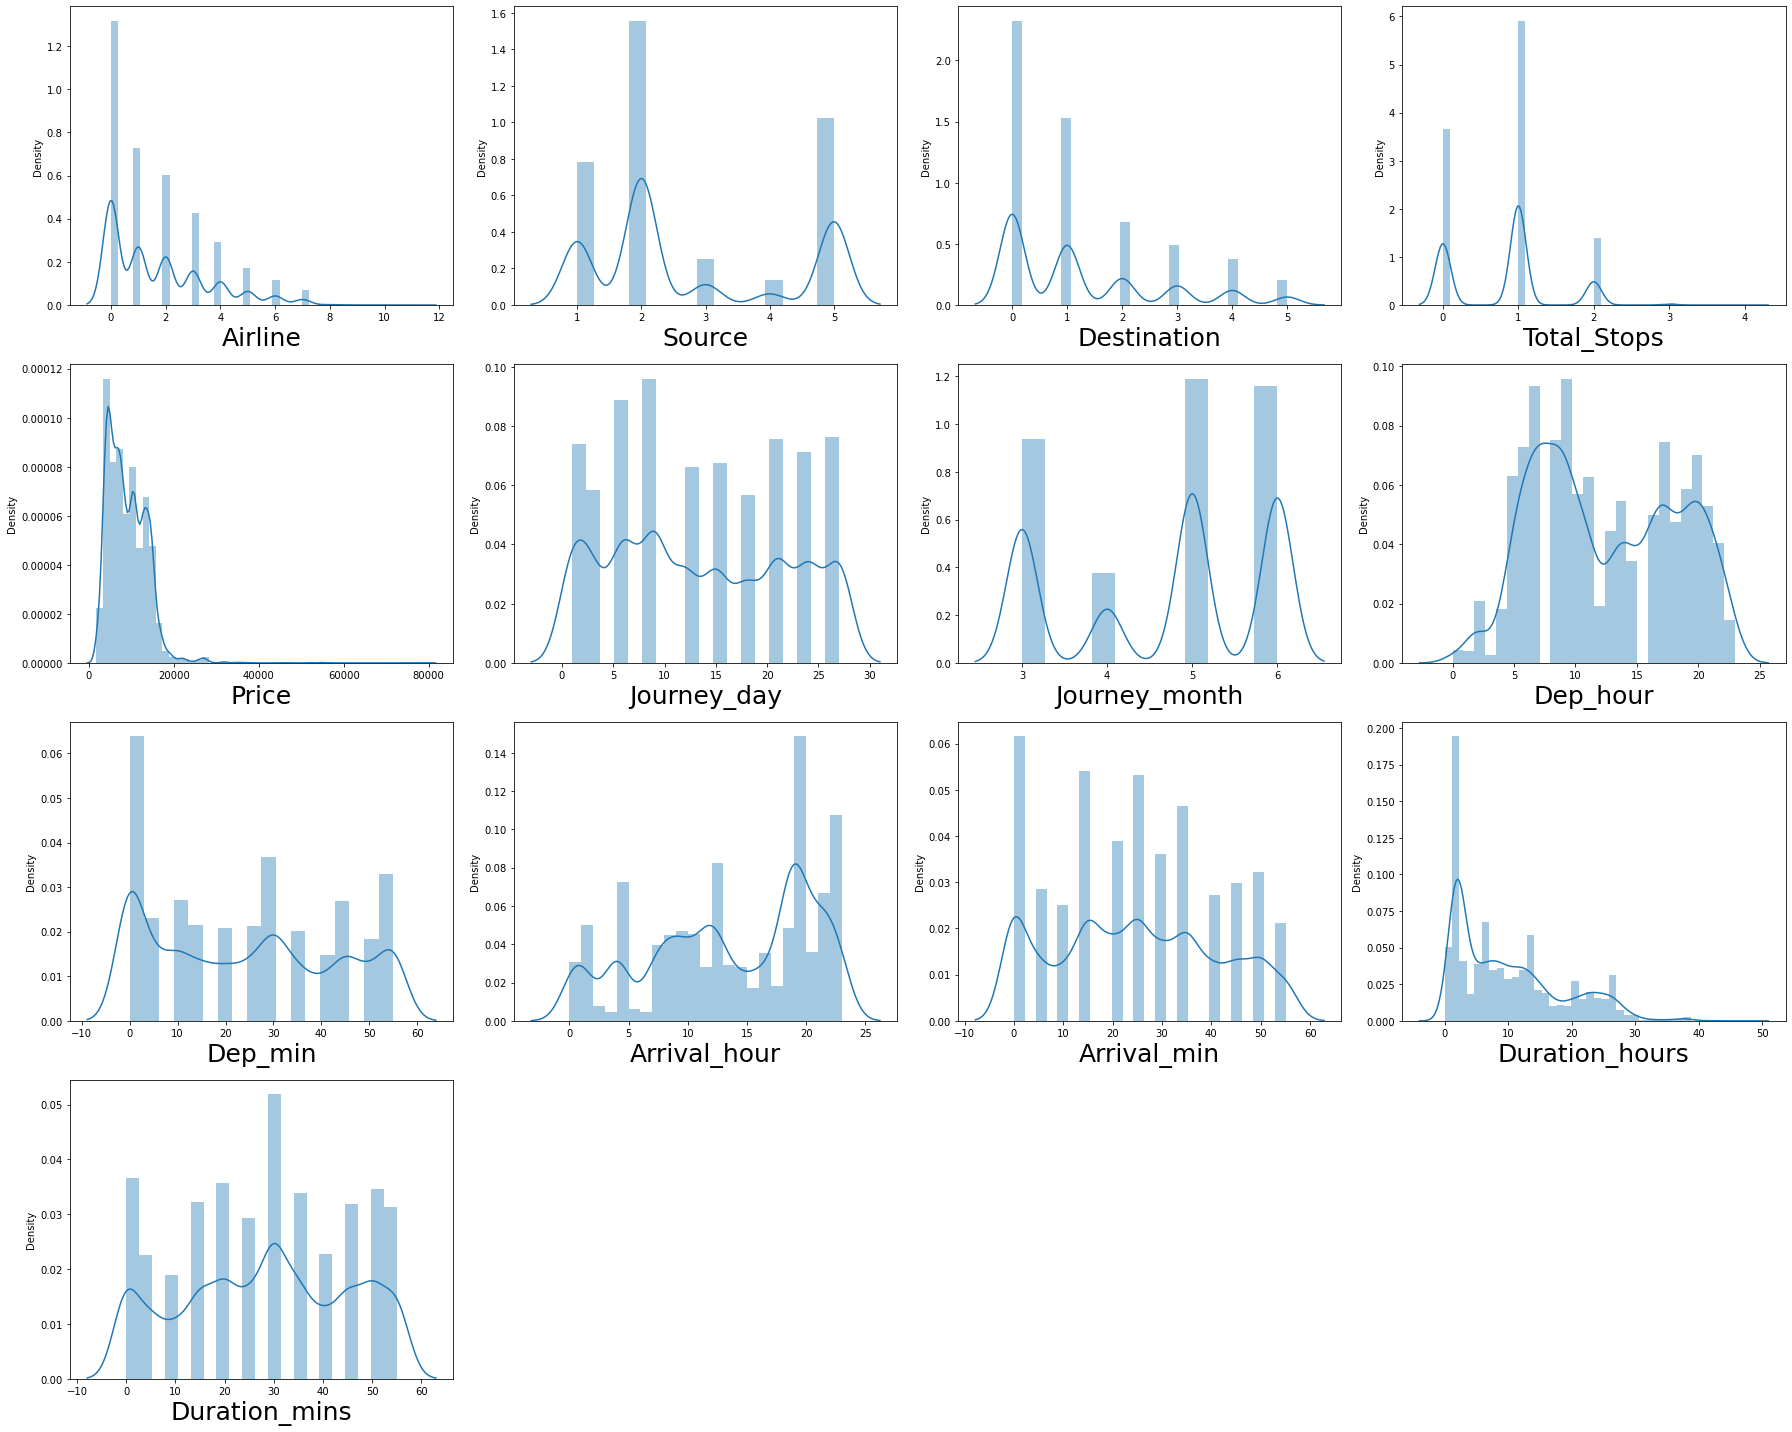

In [34]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

## Replacing all the zero values from different columns

In [35]:
# Replacing continous columns with mean
df['Dep_hour']=df['Dep_hour'].replace(0,df['Dep_hour'].mean())
df['Dep_min']=df['Dep_min'].replace(0,df['Dep_min'].mean())
df['Arrival_hour']=df['Arrival_hour'].replace(0,df['Arrival_hour'].mean())
df['Arrival_min']=df['Arrival_min'].replace(0,df['Arrival_min'].mean())
df['Duration_hours']=df['Duration_hours'].replace(0,df['Duration_hours'].mean())
df['Duration_mins']=df['Duration_mins'].replace(0,df['Duration_mins'].mean())

#### There are few zero values in the above cloumns that is replaced with mean.

## Box Plot

Airline               AxesSubplot(0.125,0.71587;0.168478x0.16413)
Source             AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Destination        AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Total_Stops        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Price                AxesSubplot(0.125,0.518913;0.168478x0.16413)
Journey_day       AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Journey_month     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Dep_hour          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Dep_min              AxesSubplot(0.125,0.321957;0.168478x0.16413)
Arrival_hour      AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Arrival_min       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Duration_hours    AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Duration_mins           AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

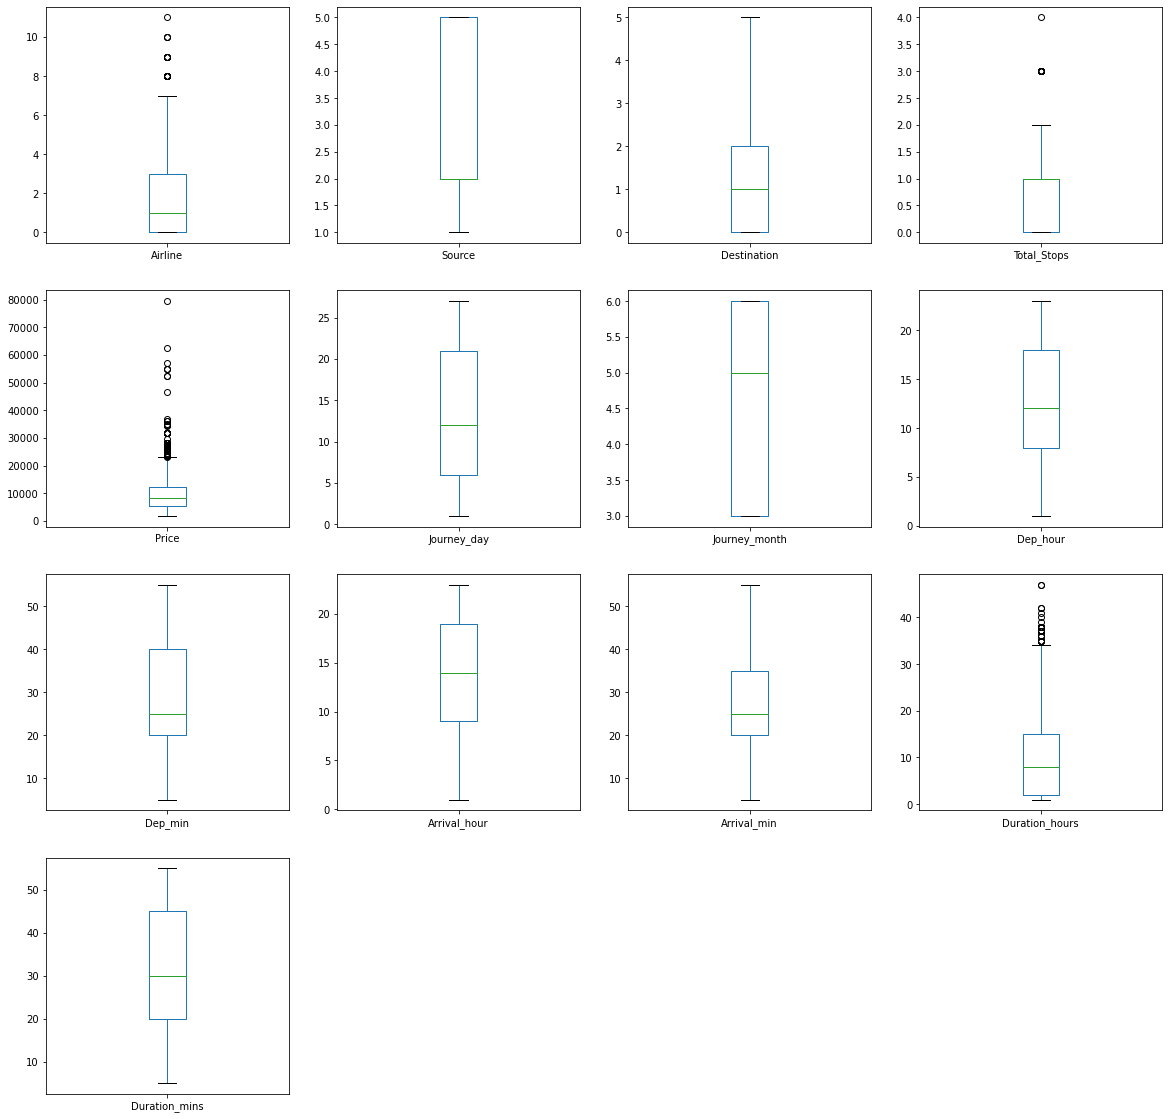

In [36]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,20))

#### There are outliers in Duration_hours,Price which is continous in nature.

## Z score

In [37]:
z_score = zscore(df[['Duration_hours','Price']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.describe()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000
mean,1.740784,2.768238,1.218665,0.791114,8811.150757,13.560924,4.722352,12.562201,29.097050,13.776968,28.099495,9.844783,30.994955
std,1.849519,1.524208,1.417131,0.654207,4061.260145,8.430454,1.155234,5.663605,14.637875,6.431762,13.437356,8.133227,14.193786
min,0.000000,1.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,1.000000,5.000000,1.000000,5.000000,1.000000,5.000000
25%,0.000000,2.000000,0.000000,0.000000,5198.000000,6.000000,4.000000,8.000000,20.000000,9.000000,20.000000,2.000000,20.000000
50%,1.000000,2.000000,1.000000,1.000000,8073.000000,12.000000,5.000000,12.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,3.000000,5.000000,2.000000,1.000000,12199.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,11.000000,5.000000,5.000000,4.000000,22798.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,35.000000,55.000000


In [38]:
df.shape

(10308, 13)

#### For removing the outliers i have used Z Score for Duration_hours and Price columns.
#### After removing the outliers there are 10308 rows and 13 columns in dataset.

## Machine Learning

In [39]:
# dividing features and label

x = df.drop('Price',axis=1)
y = df.Price

#### Dividing features and label into x and y for model prediction.

## StandardScaler

In [40]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.40054723, -1.16015938,  1.25706213, ..., -1.34701889,
        -0.96458196,  1.33903437],
       [ 0.14016006,  1.46428192, -0.15430879, ..., -0.97490383,
        -0.34979   , -0.42238521],
       [-0.94125451, -0.50404905, -0.85999426, ..., -0.23067373,
         1.12571072, -0.19612621],
       ...,
       [-0.94125451, -1.16015938,  0.55137667, ..., -0.60278878,
        -0.84162357, -0.19612621],
       [ 1.76228191, -1.16015938,  1.25706213, ..., -1.34701889,
        -0.96458196,  0.63446653],
       [ 0.14016006, -0.50404905, -0.85999426, ..., -0.97490383,
        -0.2268316 , -0.77466913]])

#### Applying the standard scaler to scaled the dataset in one range.

## Visualize the correlation

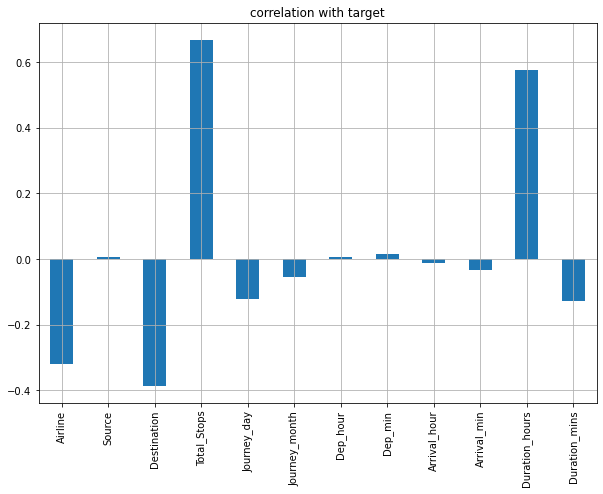

In [41]:
df.drop('Price',axis=1).corrwith(df.Price).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

#### I have checked the relationship between label and different features.
#### Most of the features are in minus value only 2 columns are positively related to target value.

## VIF - variance inflation factor

In [42]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.098401,Airline
1,1.099505,Source
2,1.540076,Destination
3,2.596374,Total_Stops
4,1.013425,Journey_day
5,1.087424,Journey_month
6,1.043244,Dep_hour
7,1.030624,Dep_min
8,1.022978,Arrival_hour
9,1.019383,Arrival_min


#### None of the features vif score value is above 5. So i can say that Multicollinearity doesn't exist.

## Model Building

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

#### Using the train test split to divide the datset into training and testing dataset.

## Linear Regression model

In [44]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [45]:
# adjusted r2 score
rg.score(x_train,y_train)

0.5211726205173782

In [46]:
rg.score(x_test,y_test)

0.5353513551149165

In [47]:
y_pred = rg.predict(x_test)
y_pred

array([ 6562.85933378, 10259.8302461 ,  9353.95588065, ...,
        9758.89322486, 10337.02967641,  4502.07355808])

### Scatter plot of Linear Regression

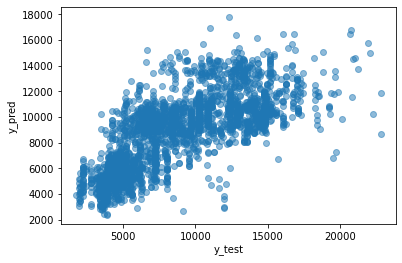

In [48]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [49]:
mean_squared_error(y_test,y_pred)

7750547.274777672

### RMSE

In [50]:
np.sqrt(mean_squared_error(y_test,y_pred))

2783.9804731315326

### r2 score

In [51]:
r2_score(y_test,y_pred)

0.5353513551149165

#### Linear Regression model - 53.53%

## Decision Tree Regressor Model

In [52]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [53]:
# adjusted r2 score
dt.score(x_train,y_train)

0.9629219415843084

In [54]:
dt.score(x_test,y_test)

0.7214339541731414

In [55]:
y_pred = dt.predict(x_test)
y_pred

array([ 5000.,  5883.,  8425., ...,  8937., 10577.,  3543.])

### Scatter plot of Decision Tree Regressor Model

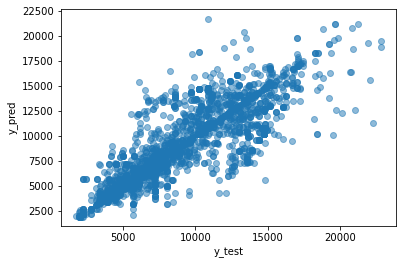

In [56]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [57]:
mean_squared_error(y_test,y_pred)

4646606.2714181

### RMSE

In [58]:
np.sqrt(mean_squared_error(y_test,y_pred))

2155.598819682851

### r2 score

In [59]:
r2_score(y_test,y_pred)

0.7214339541731414

#### Decision Tree Regressor Model is 72.14%

### Random Forest Regressor Model

In [60]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [61]:
# adjusted r2 score
rf.score(x_train,y_train)

0.9499536785201632

In [62]:
rf.score(x_test,y_test)

0.8158756051754242

In [63]:
y_pred = rf.predict(x_test)
y_pred

array([ 5526.37166667,  6205.23      ,  7177.6       , ...,
        7960.26      , 11203.67      ,  3560.084     ])

### Scatter plot of Random Forest Regressor Model

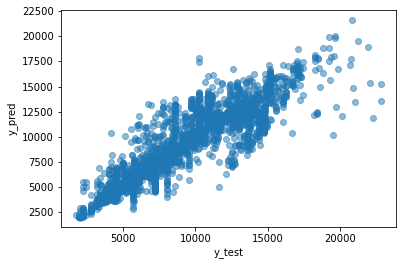

In [64]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [65]:
mean_squared_error(y_test,y_pred)

3071277.28066579

### RMSE

In [66]:
np.sqrt(mean_squared_error(y_test,y_pred))

1752.5060001796828

### r2 score

In [67]:
r2_score(y_test,y_pred)

0.8158756051754242

#### Random Forest Regressor Model is 81.58%

## AdaBoost Regressor Model

In [68]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [69]:
# adjusted r2 score
ada.score(x_train,y_train)

0.5976607015843937

In [70]:
ada.score(x_test,y_test)

0.5943770484312361

In [71]:
y_pred = ada.predict(x_test)
y_pred

array([ 6378.43741588, 10366.42557163,  9938.88429752, ...,
       10208.77665877, 11926.84459116,  6548.31370826])

### Scatter plot of AdaBoost Regressor Model

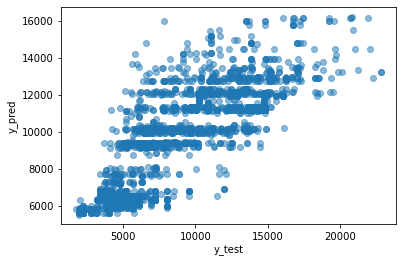

In [72]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [73]:
mean_squared_error(y_test,y_pred)

6765972.302891533

### RMSE

In [74]:
np.sqrt(mean_squared_error(y_test,y_pred))

2601.1482662261938

### r2 score

In [75]:
r2_score(y_test,y_pred)

0.5943770484312361

#### AdaBoost Regressor Model is 59.43%

### Hyperparameter Tuning in Random Forest Regressor Model

#### Using RandomizedSearchCV method for improving the r2 score

In [76]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [77]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [78]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [79]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [80]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [81]:
prediction = rf_random.predict(x_test)

### Scatter Plot

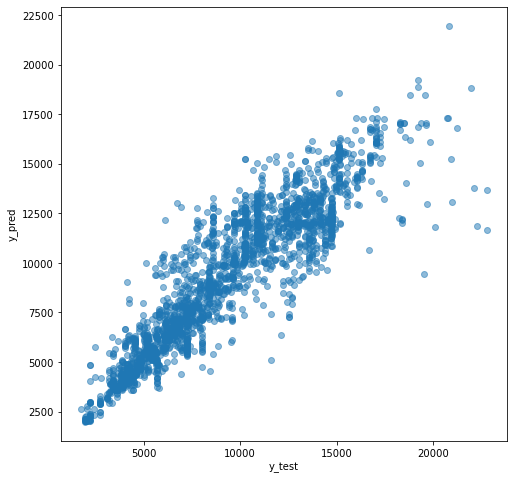

In [82]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [83]:
mean_squared_error(y_test,y_pred)

6765972.302891533

### RMSE

In [84]:
np.sqrt(mean_squared_error(y_test,y_pred))

2601.1482662261938

### r2 score

In [85]:
r2_score(y_test,y_pred)

0.5943770484312361

#### Random Forest Regressor is the best model as r2 score is 81.58 but when i have tried the hyper parameter tuning to improve r2 score, it is working adverse as it reducing the accuracy score.So i will not include randomised seach cv prediction r2 score for model prediction.

## Regularization

In [86]:
# lasso regularization

lasscv = LassoCV(alphas = None,cv=10,max_iter=5000,normalize=True)

In [87]:
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True)

In [88]:
# best alphas parameters

alpha = lasscv.alpha_
alpha

0.043574195912922165

In [89]:
# now we have best parameter lets use the lasso regularization

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.043574195912922165)

In [90]:
lasso_reg.score(x_test,y_test)

0.5353502868294515

### Saving the Best Model

In [91]:
import pickle

In [92]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

#### From the Above Coding I Get best model is Random Forest Accuracy Score.
#### So I will Save the Random Forest Regressor as the Best Model.

## COCLUSION

#### The overall survey for the dynamic price changes in the flight tickets is presented. This gives the information about the highs and lows in the airfares acording to the days, weekend and time of the day that is morning, evening and night. Also the machine learning models in the computational intelligence feild that are evaluated before on different datasets are studied. Their accuracy and performances are evaluated and compared in order to get better result. For the prediction of the ticket prices perfectly differnt prediction models are tested for the better prediction accuracy. As the pricing models of the company are developed in order to maximize the revenue management. So to get result with maximum accuracy regression analysis is used. From the studies , the feature that influences the prices of the ticket are to be considered. In future the details about number of availble seats can improve the performance of the model.